## Load the library and dataset

In [10]:
#Load the library needed

import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from typing import Dict, Text
from ast import literal_eval
from datetime import datetime
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [11]:
#Load the dataset
# dataset resources: https://www.kaggle.com/datasets/dionisiusdh/imdb-indonesian-movies
movie_df = pd.read_csv('/indonesian_movies.csv')

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


In [12]:
movie_df.sample(5)

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
968,Me vs. High Heels,2005,NaN,NaN,NaN,5.4,16,Indonesian,Nayato Fio Nuala,"['Raffi Ahmad', 'Dwi Andhika', 'Anggur Aulia',...",118 min
312,Hangout,2016,Nine people who were invited to a mysterious i...,Comedy,13+,5.9,564,Indonesian,Raditya Dika,"['Raditya Dika', 'Soleh Solihun', 'Prilly Latu...",101 min
1232,Tuyul,1979,NaN,Horror,NaN,5.4,9,Indonesian,Bay Isbahi,"['M. Pandji Anom', 'Hamid Arief', 'Idjah Bombe...",NaN
1212,Ratu Ilmu Hitam,1981,A woman is accused of being a witch and thrown...,Horror,Not Rated,6.0,226,English,Liliek Sudjio,"['Suzzanna', 'W.D. Mochtar', 'Teddy Purba', 'S...",NaN
735,Te[rekam],2010,NaN,Horror,NaN,3.6,14,Indonesian,Nayato Fio Nuala,"['Monique Henry', 'Olga Lydia', 'Julia Perez',...",75 min


## Cleaning dataset

In [13]:
movie_df.isna().sum()

title             0
year              0
description     432
genre            36
rating          896
users_rating      0
votes             0
languages         0
directors         7
actors            0
runtime         403
dtype: int64

In [14]:

movie_df.dropna(subset=['description', 'genre', 'rating', 'directors', 'runtime'], inplace=True)
#movie_df.dropna(subset=['genre'], inplace=True)

movie_df.shape

(286, 11)

In [15]:
#Remove commas and change to integer data type
movie_df['votes'] = movie_df['votes'].str.replace(',', '').astype(int)

movie_df['runtime'] = movie_df['runtime'].str.replace(' min', '').astype(int)

## Insight the data

Word "love", "girl", "become", "year" apparently appear in many occasions

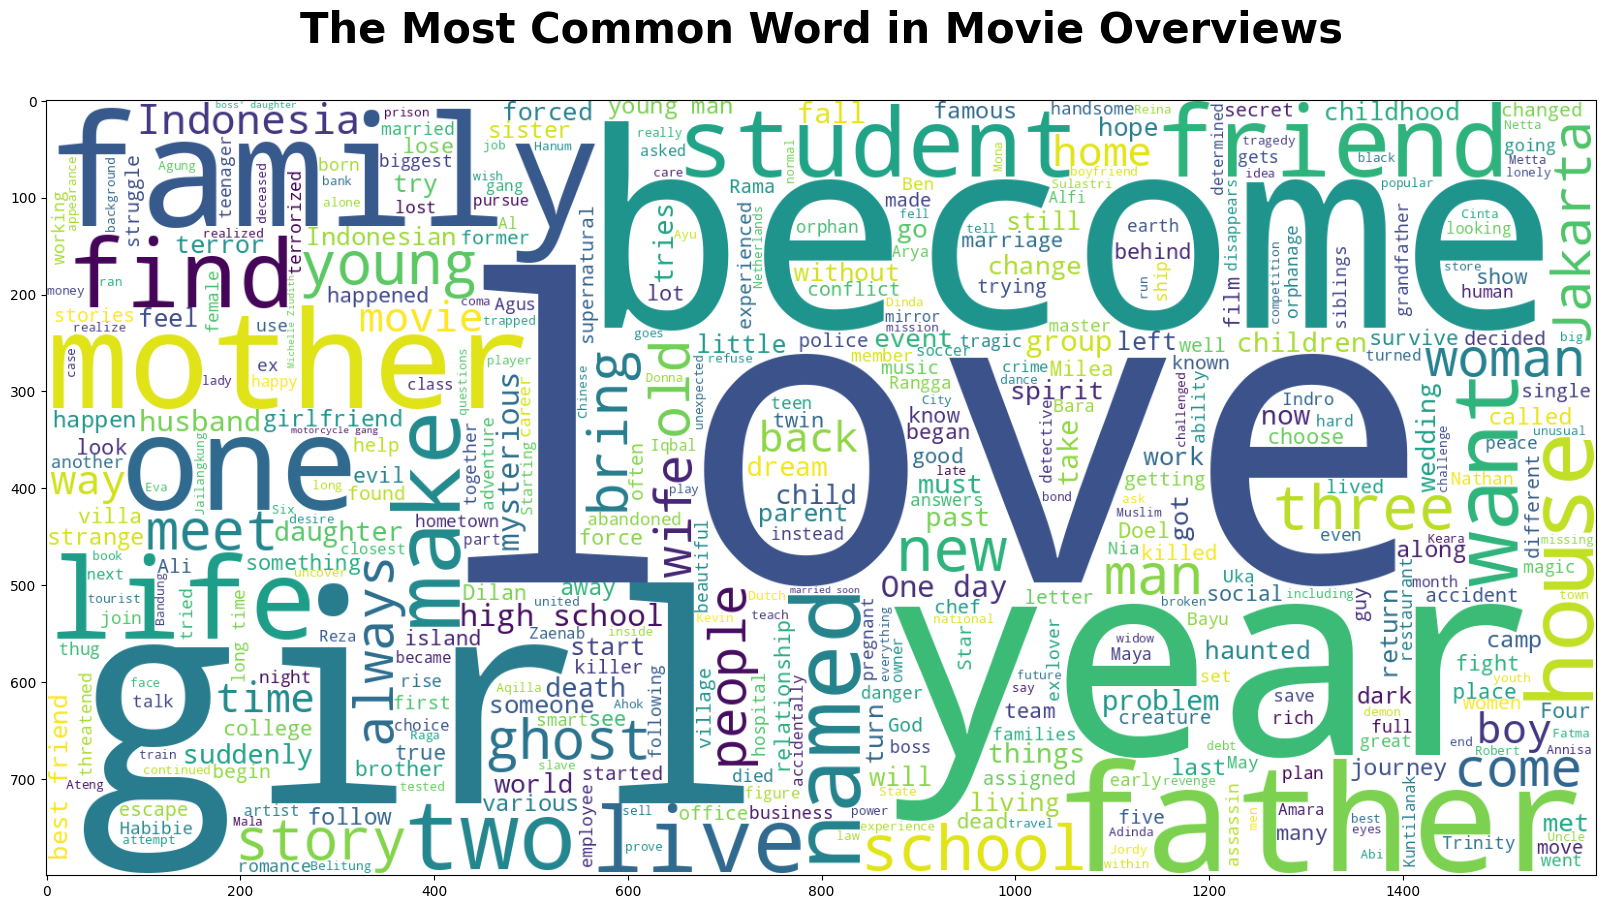

In [16]:
plt.figure(figsize=(20,20))
plt.title('The Most Common Word in Movie Overviews\n', fontsize=30, weight=600)
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(movie_df['description']))

plt.imshow(wc)

- "Drama" is the most dominant genre with over the movies
- Out of 5 top genres, there are still many genres in the dataset. They hold 2.52% of total genres in the movies

(-1.25, 1.25, -1.25, 1.25)

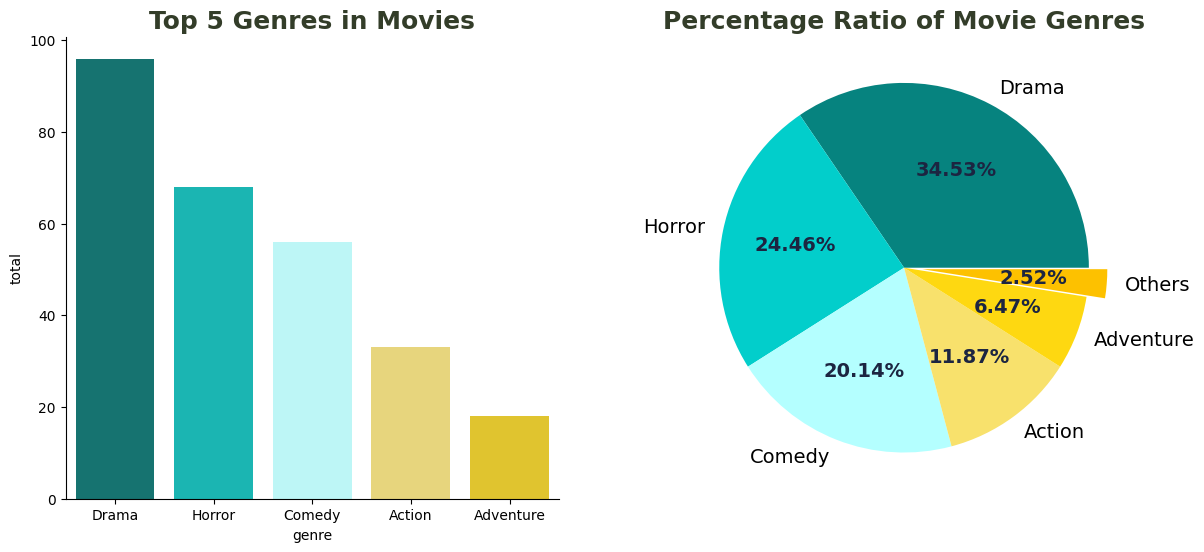

In [22]:
genres_list = []
for i in movie_df['genre']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100']

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=colors)
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=colors)

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

This dataset shows that most releases occurred in 2019

Text(0.5, 1.0, 'Total Released Movie by Date')

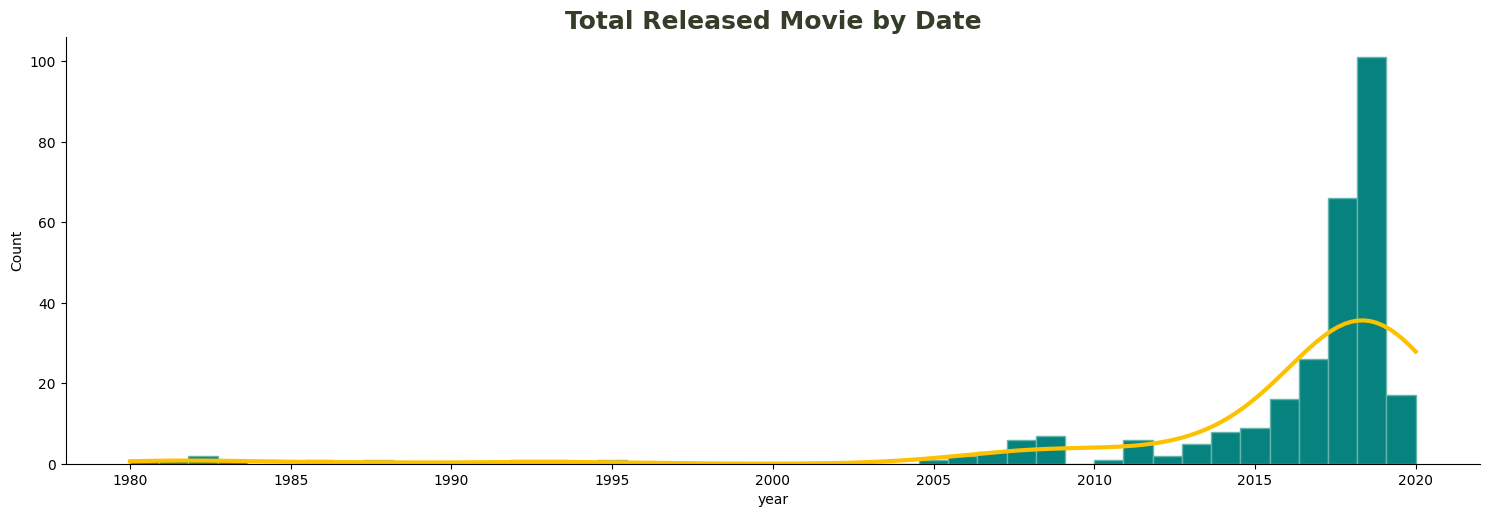

In [24]:
sns.displot(data=movie_df, x='year', kind='hist', kde=True,
            color='#fdc100', facecolor='#06837f', edgecolor='#64b6ac', line_kws={'lw': 3}, aspect=3)
plt.title('Total Released Movie by Date', fontsize=18, weight=600, color='#333d29')

<Axes: title={'center': 'Correlation of Movie Features\n'}>

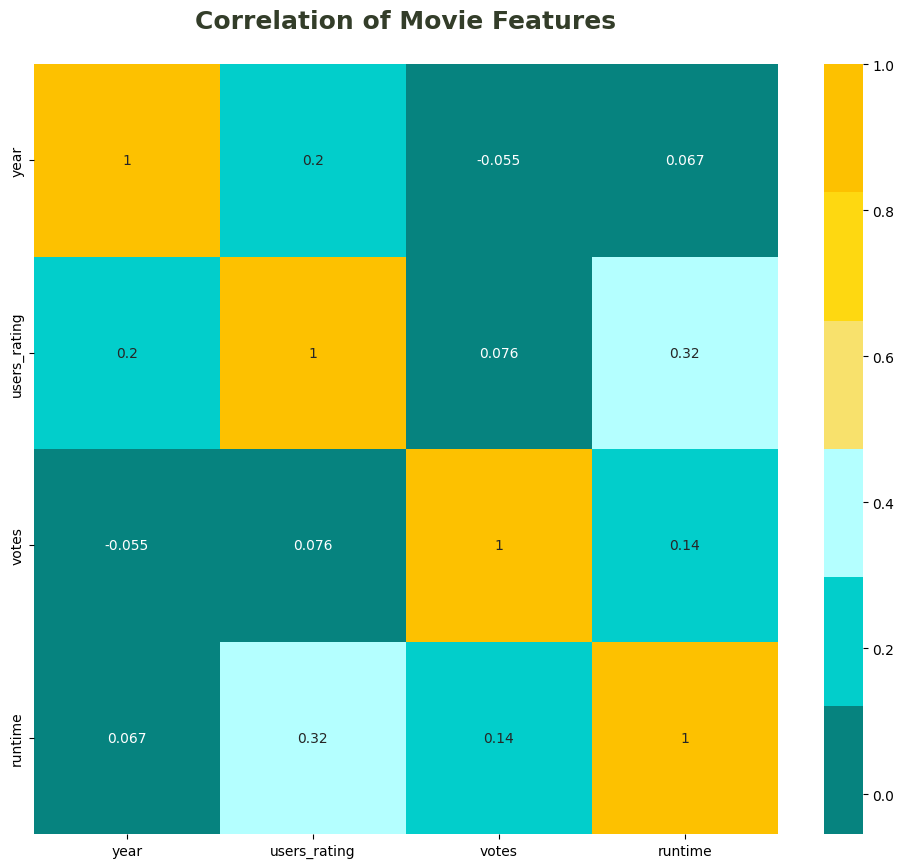

In [25]:
plt.figure(figsize=(12,10))
plt.title('Correlation of Movie Features\n', fontsize=18, weight=600, color='#333d29')
sns.heatmap(movie_df.corr(), annot=True, cmap=colors)